<a href="https://colab.research.google.com/github/Ujjwal10228/Stock-Price-Forecasting/blob/main/WIPRO_with_8_features_using_LSTM_%26_BiLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import csv
import json
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, TimeDistributed
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math

In [ ]:
data_path = ("/content/WIPRO_with_indicators_.csv")

In [ ]:
data = pd.read_csv(data_path)
df = pd.DataFrame(data)
df.head()

,date,open,high,low,close,volume,sma5,sma10,sma15,sma20,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,2015-02-02 14:30:00+05:30,234.66,234.96,234.53,234.55,38304,234.538,234.683,234.572000,234.3885,...,55.554945,18.617434,33.947266,41.953980,-55.244755,0.482169,0.43,234.680000,37.326470,-0.330491
1,2015-02-02 14:35:00+05:30,234.55,234.72,234.12,234.59,48176,234.594,234.650,234.600667,234.4290,...,48.279949,24.920845,23.388952,43.552696,-52.447552,0.490586,0.60,234.476667,37.297326,-0.130622
2,2015-02-02 14:40:00+05:30,234.59,235.15,234.59,234.74,108766,234.692,234.633,234.636000,234.4750,...,51.318295,37.040082,26.859454,43.634665,-41.958042,0.495544,0.56,234.826667,36.466752,0.742299
3,2015-02-02 14:45:00+05:30,234.74,234.74,233.29,234.27,80930,234.562,234.605,234.642667,234.5030,...,53.613843,0.000000,20.653642,50.105308,-52.195122,0.563719,1.45,234.100000,35.667311,1.780826
4,2015-02-02 14:50:00+05:30,234.27,234.47,233.86,234.42,32368,234.514,234.556,234.631333,234.5325,...,57.878345,25.874517,20.971533,56.588824,-44.878049,0.567025,0.61,234.250000,34.390203,1.392145


In [ ]:
df.shape

(130111, 59)

In [ ]:
df.tail()

,date,open,high,low,close,volume,sma5,sma10,sma15,sma20,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
130106,2022-02-15 14:05:00+05:30,558.15,559.45,557.00,559.35,82005,557.60,555.910,555.316667,554.9775,...,91.923147,100.000000,100.000000,76.269835,-1.538462,1.227273,2.45,558.600000,16.542759,-1.172276
130107,2022-02-15 14:10:00+05:30,559.40,559.45,557.55,557.90,88864,557.93,556.360,555.550000,555.2275,...,81.766579,0.000000,66.666667,67.390135,-23.846154,1.275325,1.90,558.300000,15.987164,-0.550489
130108,2022-02-15 14:15:00+05:30,557.95,559.45,557.95,558.60,74874,558.29,556.870,555.820000,555.4975,...,74.496464,20.142690,40.047563,64.237876,-13.076923,1.294944,1.55,558.666667,15.535541,-0.322601
130109,2022-02-15 14:20:00+05:30,558.60,559.50,558.25,558.35,80194,558.48,557.315,556.103333,555.7300,...,59.920706,4.411347,8.184679,57.855465,-17.557252,1.291734,1.25,558.700000,15.213401,-0.638675
130110,2022-02-15 14:25:00+05:30,558.30,559.00,557.80,558.60,74430,558.56,557.690,556.433333,555.9175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[['open','high', 'low', 'volume', 'close', 'BETA', 'HT_DCPERIOD', 'Trange']] = MinMaxScaler(feature_range=(0, 1)).fit_transform(df[['open','high', 'low', 'volume', 'close', 'BETA', 'HT_DCPERIOD', 'Trange']])


In [ ]:
df.shape

(17145, 59)

In [ ]:
final_data = df[['open','date','high', 'low', 'volume', 'close', 'BETA', 'HT_DCPERIOD', 'Trange']][0:10000] # Taking 10k data only first
input_sequences = []
labels = []

# Creating features & labels for forecasting
for i in range(10, len(final_data)):
  if i>=10:
    input_sequences.append(final_data[['open','high', 'low', 'volume', 'close', 'BETA', 'HT_DCPERIOD', 'Trange']][i-10:i])
    labels.append(final_data['close'][i])

# Creating train test split
X_train = np.array(input_sequences[0:8000])
X_test = np.array(input_sequences[8000:])
y_train = np.array(labels[0:8000])
y_test = np.array(labels[8000:])

In [ ]:
X_train.shape, y_train.shape

((8000, 10, 8), (8000,))

In [ ]:
X_test.shape, y_test.shape

((1990, 10, 8), (1990,))

In [ ]:
print(X_train[0], y_train[0])

[[0.67627202 0.6736227  0.68354017 0.01833878 0.67435348 0.43908386
  0.79332001 0.03536184]
 [0.67446073 0.66961603 0.6768452  0.0230652  0.67501235 0.44573974
  0.79248295 0.04934211]
 [0.67511938 0.67679466 0.68451992 0.05207384 0.67748312 0.47480909
  0.76862765 0.04605263]
 [0.67758933 0.66994992 0.66329197 0.03874681 0.66974139 0.50939329
  0.74566652 0.11924342]
 [0.66985016 0.6654424  0.67259961 0.01549681 0.67221216 0.49644974
  0.70898608 0.05016447]
 [0.67264943 0.66527546 0.67210973 0.02462216 0.66809422 0.49694219
  0.66451928 0.05180921]
 [0.66820352 0.66427379 0.67766166 0.03015769 0.67122385 0.4960108
  0.61614841 0.01891447]
 [0.66886218 0.66110184 0.67749837 0.04154761 0.66875309 0.53970741
  0.57149712 0.01644737]
 [0.66886218 0.67429048 0.67749837 0.05646224 0.6811069  0.44005038
  0.53514976 0.06907895]
 [0.68252923 0.67996661 0.68941868 0.09395372 0.68522484 0.45274584
  0.50851661 0.03700658]] 0.6929665623455774


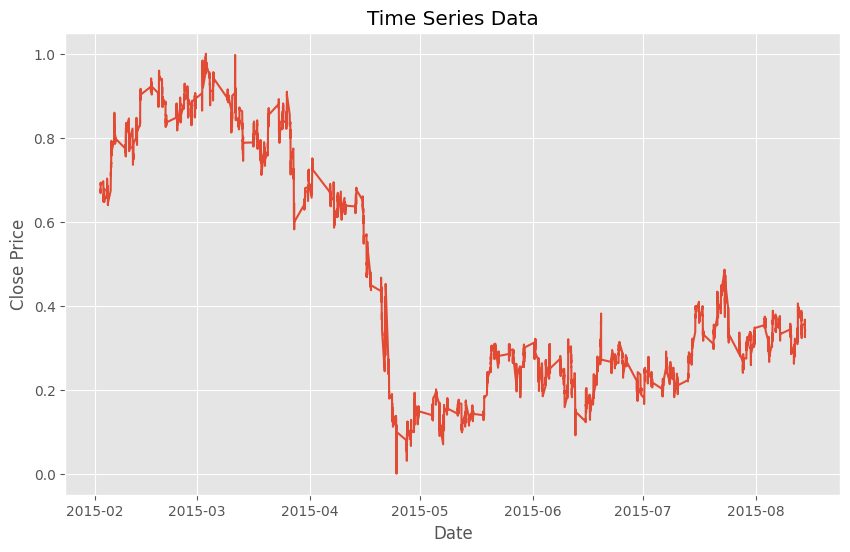

In [ ]:
plt.style.use('ggplot')

# COnvert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Plotting time series data
plt.figure(figsize=(10, 6))
plt.plot(df['date'][0:10000], df['close'][0:10000])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Data')
plt.grid(True)
plt.show()

BiLSTM Model

In [ ]:
from ctypes import BigEndianStructure
from keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Model
model = Sequential()

model.add(Bidirectional(LSTM(units=128, activation='tanh', return_sequences=True, input_shape=(10, 8))))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units=64, activation='tanh', return_sequences=True)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units=32, activation='tanh', return_sequences=True)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(units=1, activation='linear', return_sequences=True)))
model.add(Dropout(0.1))

model.add(TimeDistributed(Dense(units=1, activation='linear')))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error',rmse])



In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
250/250 [==============================] - 28s 48ms/step - loss: 0.1051 - mean_squared_error: 0.1051 - rmse: 0.3231 - val_loss: 0.0293 - val_mean_squared_error: 0.0293 - val_rmse: 0.1628
Epoch 2/10
250/250 [==============================] - 10s 40ms/step - loss: 0.0976 - mean_squared_error: 0.0976 - rmse: 0.3119 - val_loss: 0.0179 - val_mean_squared_error: 0.0179 - val_rmse: 0.1228
Epoch 3/10
250/250 [==============================] - 11s 46ms/step - loss: 0.0950 - mean_squared_error: 0.0950 - rmse: 0.3077 - val_loss: 0.0314 - val_mean_squared_error: 0.0314 - val_rmse: 0.1690
Epoch 4/10
250/250 [==============================] - 13s 50ms/step - loss: 0.0929 - mean_squared_error: 0.0929 - rmse: 0.3043 - val_loss: 0.0184 - val_mean_squared_error: 0.0184 - val_rmse: 0.1252
Epoch 5/10
250/250 [==============================] - 9s 35ms/step - loss: 0.0919 - mean_squared_error: 0.0919 - rmse: 0.3027 - val_loss: 0.0242 - val_mean_squared_error: 0.0242 - val_rmse: 0.1460
Epoch 6/10


In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
125/125 [==============================] - 7s 33ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2997 - val_loss: 0.0253 - val_mean_squared_error: 0.0253 - val_rmse: 0.1497
Epoch 2/10
125/125 [==============================] - 3s 21ms/step - loss: 0.0900 - mean_squared_error: 0.0900 - rmse: 0.2996 - val_loss: 0.0260 - val_mean_squared_error: 0.0260 - val_rmse: 0.1520
Epoch 3/10
125/125 [==============================] - 3s 21ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2996 - val_loss: 0.0271 - val_mean_squared_error: 0.0271 - val_rmse: 0.1553
Epoch 4/10
125/125 [==============================] - 3s 22ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2996 - val_loss: 0.0265 - val_mean_squared_error: 0.0265 - val_rmse: 0.1537
Epoch 5/10
125/125 [==============================] - 5s 37ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2997 - val_loss: 0.0271 - val_mean_squared_error: 0.0271 - val_rmse: 0.1553
Epoch 6/10
125/

LSTM Model

In [ ]:
from ctypes import BigEndianStructure
from keras import backend as K

def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

# Model
model = Sequential()

model.add(LSTM(units=128, activation='tanh', return_sequences=True, input_shape=(10, 8)))
model.add(Dropout(0.1))
model.add(LSTM(units=64, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=32, activation='tanh', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=1, activation='linear', return_sequences=True))
model.add(Dropout(0.1))

model.add(TimeDistributed(Dense(units=1, activation='linear')))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error',rmse])



In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/10
250/250 [==============================] - 12s 21ms/step - loss: 0.1285 - mean_squared_error: 0.1285 - rmse: 0.3549 - val_loss: 0.0238 - val_mean_squared_error: 0.0238 - val_rmse: 0.1447
Epoch 2/10
250/250 [==============================] - 5s 20ms/step - loss: 0.1019 - mean_squared_error: 0.1019 - rmse: 0.3187 - val_loss: 0.0139 - val_mean_squared_error: 0.0139 - val_rmse: 0.1057
Epoch 3/10
250/250 [==============================] - 5s 22ms/step - loss: 0.0972 - mean_squared_error: 0.0972 - rmse: 0.3113 - val_loss: 0.0220 - val_mean_squared_error: 0.0220 - val_rmse: 0.1380
Epoch 4/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0939 - mean_squared_error: 0.0939 - rmse: 0.3060 - val_loss: 0.0189 - val_mean_squared_error: 0.0189 - val_rmse: 0.1263
Epoch 5/10
250/250 [==============================] - 5s 21ms/step - loss: 0.0921 - mean_squared_error: 0.0921 - rmse: 0.3031 - val_loss: 0.0225 - val_mean_squared_error: 0.0225 - val_rmse: 0.1396
Epoch 6/10
250

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/10
125/125 [==============================] - 3s 22ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2996 - val_loss: 0.0281 - val_mean_squared_error: 0.0281 - val_rmse: 0.1585
Epoch 2/10
125/125 [==============================] - 5s 37ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2996 - val_loss: 0.0270 - val_mean_squared_error: 0.0270 - val_rmse: 0.1553
Epoch 3/10
125/125 [==============================] - 3s 23ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2996 - val_loss: 0.0252 - val_mean_squared_error: 0.0252 - val_rmse: 0.1494
Epoch 4/10
125/125 [==============================] - 3s 25ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2995 - val_loss: 0.0276 - val_mean_squared_error: 0.0276 - val_rmse: 0.1572
Epoch 5/10
125/125 [==============================] - 3s 21ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2996 - val_loss: 0.0266 - val_mean_squared_error: 0.0266 - val_rmse: 0.1540
Epoch 6/10
125/

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=100)

Epoch 1/10
80/80 [==============================] - 3s 42ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2997 - val_loss: 0.0264 - val_mean_squared_error: 0.0264 - val_rmse: 0.1543
Epoch 2/10
80/80 [==============================] - 2s 21ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2996 - val_loss: 0.0264 - val_mean_squared_error: 0.0264 - val_rmse: 0.1541
Epoch 3/10
80/80 [==============================] - 2s 22ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2997 - val_loss: 0.0255 - val_mean_squared_error: 0.0255 - val_rmse: 0.1513
Epoch 4/10
80/80 [==============================] - 3s 42ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2996 - val_loss: 0.0268 - val_mean_squared_error: 0.0268 - val_rmse: 0.1555
Epoch 5/10
80/80 [==============================] - 2s 22ms/step - loss: 0.0899 - mean_squared_error: 0.0899 - rmse: 0.2996 - val_loss: 0.0262 - val_mean_squared_error: 0.0262 - val_rmse: 0.1536
Epoch 6/10
80/80 [=======

## Dataset Concatenation with Natural Disaster

In [ ]:
import pandas as pd

# Load the datasets
stock_data = pd.read_csv('/content/WIPRO_with_indicators_.csv')
disaster_data = pd.read_csv('/content/Natural_Disasters_in_India .csv')

# Convert stock date to datetime format
stock_data['date'] = pd.to_datetime(stock_data['date'], format='%Y-%m-%d %H:%M:%S%z')

# Convert disaster date to datetime format
disaster_data['date'] = pd.to_datetime(disaster_data['date'], format='%d-%m-%Y')

# Extract date part from the stock data to match with disaster data
stock_data['date_only'] = stock_data['date'].dt.date

# Create a new dataframe for disaster dates repeated for each 5-minute interval of that day
disaster_expanded = pd.DataFrame()
for disaster_date in disaster_data['date']:
    mask = stock_data['date_only'] == disaster_date.date()
    expanded = stock_data[mask].copy()
    expanded['disaster'] = True
    disaster_expanded = pd.concat([disaster_expanded, expanded], ignore_index=True)

# Mark stock data without disasters as False
stock_data['disaster'] = False

# Combine both datasets
combined_data = pd.concat([stock_data, disaster_expanded], ignore_index=True)

# Sorting combined data based on date to ensure the order is maintained
combined_data = combined_data.sort_values(by='date')

# Fill any NaNs in the 'disaster' column with False
combined_data['disaster'].fillna(False, inplace=True)

# Drop the 'date_only' column as it's no longer needed
combined_data.drop(columns=['date_only'], inplace=True)

# Save the combined data to a new CSV file
combined_data.to_csv('path_to_combined_data.csv', index=False)

print(combined_data.head())


ValueError: time data "2020-08–25 " doesn't match format "%d-%m-%Y", at position 187. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
import pandas as pd

# Load the datasets
stock_data = pd.read_csv('/content/WIPRO_with_indicators_.csv')
disaster_data = pd.read_csv('/content/Natural_Disasters_in_India .csv')

# Inspect the unique formats in disaster dates
unique_formats = disaster_data['date'].astype(str).apply(lambda x: len(x.split('-'))).unique()
print(f"Unique date formats in disaster data: {unique_formats}")

# Manually clean any inconsistent dates
# For demonstration, let's assume we need to replace '–' with '-'
disaster_data['date'] = disaster_data['date'].str.replace('–', '-')

# Convert stock date to datetime format
stock_data['date'] = pd.to_datetime(stock_data['date'], format='%Y-%m-%d %H:%M:%S%z')

# Convert disaster date to datetime format using a more flexible approach
def parse_dates(date):
    try:
        return pd.to_datetime(date, format='%d-%m-%Y')
    except ValueError:
        return pd.to_datetime(date, format='%Y-%m-%d')

disaster_data['date'] = disaster_data['date'].apply(parse_dates)

# Extract date part from the stock data to match with disaster data
stock_data['date_only'] = stock_data['date'].dt.date

# Create a new dataframe for disaster dates repeated for each 5-minute interval of that day
disaster_expanded = pd.DataFrame()
for disaster_date in disaster_data['date']:
    mask = stock_data['date_only'] == disaster_date.date()
    expanded = stock_data[mask].copy()
    expanded['disaster'] = True
    disaster_expanded = pd.concat([disaster_expanded, expanded], ignore_index=True)

# Mark stock data without disasters as False
stock_data['disaster'] = False

# Combine both datasets
combined_data = pd.concat([stock_data, disaster_expanded], ignore_index=True)

# Sorting combined data based on date to ensure the order is maintained
combined_data = combined_data.sort_values(by='date')

# Fill any NaNs in the 'disaster' column with False
combined_data['disaster'].fillna(False, inplace=True)

# Drop the 'date_only' column as it's no longer needed
combined_data.drop(columns=['date_only'], inplace=True)

# Save the combined data to a new CSV file
combined_data.to_csv('path_to_combined_data.csv', index=False)

print(combined_data.head())


Unique date formats in disaster data: [3 1 2]


ValueError: unconverted data remains when parsing with format "%Y-%m-%d": " ", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.